<a href="https://colab.research.google.com/github/twinklegithub/HDS5210_InClass/blob/master/week12/week12_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [124]:
%matplotlib inline
import pandas as pd
import numpy as np

condemnations = pd.read_csv('/content/condemn (1).txt')
condemnations.shape

<ipython-input-124-b2b14a2b56ff>:5: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('/content/condemn (1).txt')


(32586, 40)

In [125]:
# Convert 'InspectDate' to datetime format for filtering
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

# Filter the data to include only records from 1986 to 2014 (inclusive)
condemnations = condemnations[(condemnations['InspectDate'].dt.year >= 1986) &
                              (condemnations['InspectDate'].dt.year <= 2014)]


In [126]:

# Display the first few rows to verify
condemnations.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [127]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [128]:
# Convert 'InspectDate' to datetime if it isn't already
condemnations["InspectDate"] = pd.to_datetime(condemnations["InspectDate"])

# Extract the year from 'InspectDate' and create a 'year' column
condemnations["year"] = condemnations["InspectDate"].dt.year

# Create the pivot table using 'year' instead of 'Year'
by_year = condemnations.pivot_table(index='year', columns='Status', values='InspectDate', aggfunc=np.ma.count).fillna(0)

# Convert the table to integer counts
by_year = by_year.astype(int)

# Ensure the columns are in the correct order if they exist in the data
status_columns = [col for col in ['B', 'L', 'R', 'W'] if col in by_year.columns]
by_year = by_year[status_columns]

# Display the pivot table
by_year

Status,B,L,R,W
year,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322
1991,139,18,4,351
1992,204,30,4,258
1993,185,47,2,193
1994,208,94,5,293


In [129]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='year'>

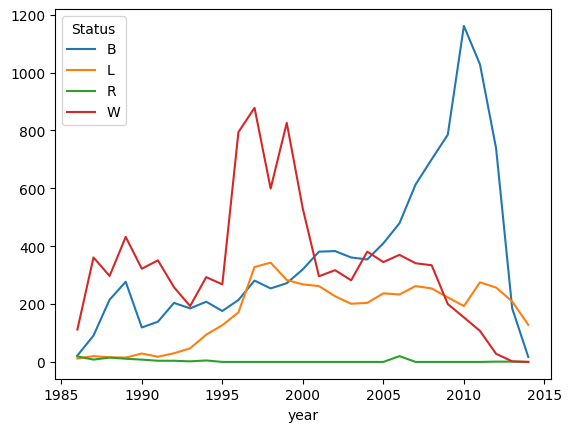

In [130]:
%matplotlib inline
by_year.plot()

---

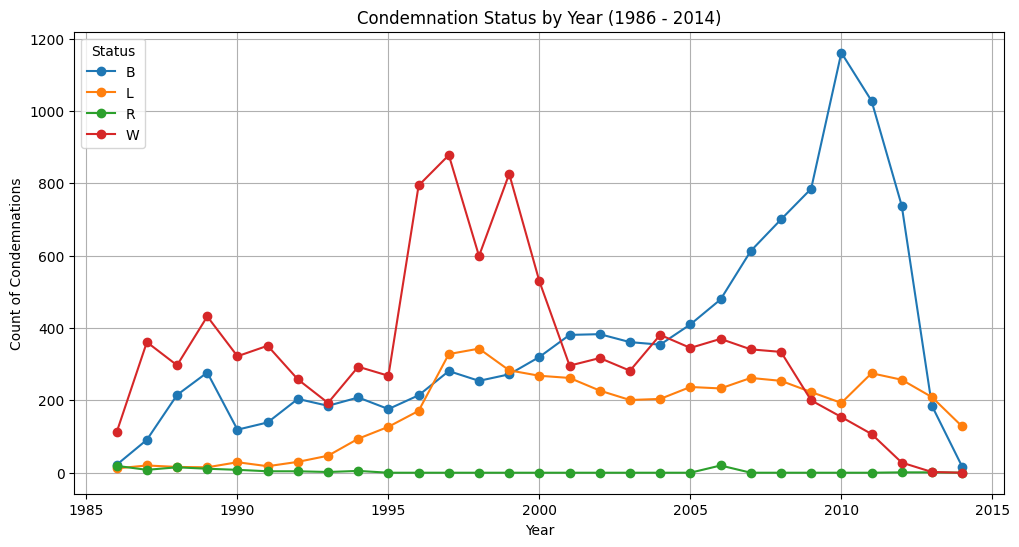

In [131]:
import matplotlib.pyplot as plt

# Plot the multi-series line chart
by_year.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Condemnation Status by Year (1986 - 2014)')
plt.xlabel('Year')
plt.ylabel('Count of Condemnations')
plt.legend(title='Status', loc='upper left')
plt.grid(True)
plt.show()


Data on "Condemnation Status by Year" from 1986 to 2014 is shown in this graph. Here is a thorough breakdown of every component.
X-axis (Year): Time, especially each year between 1986 and 2014, is represented by the horizontal axis.
Y-axis (Count of Condemnations): This vertical axis shows the number of condemnations for each year, ranges from 0 to 1200.
The graph displays four lines of varying colors that correspond to distinct "statuses" (designated as B, L, R, and W):
Status B (Blue Line): indicates a notable increase in condemnations that started in the late 2000s and peaked around 2011, followed by a precipitous decline from 2012 to 2014.
Status W (Red Line): Prior to a steady fall after reaching a peak in 1995, Status W had a high number of condemnations in the early 1990s.
Status L (Orange Line): With just slight variations, Status L is comparatively constant and suggests fewer counts overall.
Status R(Green Line):Over the years, Status R has had the fewest condemnations, as seen by its constantly low counts.
The results of this analysis indicate that the number of condemnations fluctuated considerably among statuses, showing discernible increases and decreases at various points in time.


# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [132]:
import pandas as pd

# Load the data
meetings = pd.read_csv('/content/meetings.csv')

# Step 1: Create the `startDate` column
meetings['startDate'] = meetings['startTime'].str[0:10]

# Step 2: Define periods "BEFORE" (2/17 - 2/28) and "DURING" (3/16 - 3/27)
meetings['Period'] = ''
meetings.loc[(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28'), 'Period'] = 'BEFORE'
meetings.loc[(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27'), 'Period'] = 'DURING'

# Step 3: Filter out rows where Period is not set (i.e., not in specified date ranges)
meetings = meetings[meetings['Period'].isin(['BEFORE', 'DURING'])]



In [133]:

# Step 4: Create the pivot table to get counts of meetings by user and period
summary = meetings.pivot_table(
    index='userName',
    columns='Period',
    values='meetingId',
    aggfunc='count',
    fill_value=0
).rename(columns={'BEFORE': 'Before', 'DURING': 'During'})

# Step 5: Calculate the percent increase from "BEFORE" to "DURING"
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before']).replace([float('inf'), -float('inf')], 0)

# Ensure 'pctChange' as percentage increase rounded to 2 decimal places
summary['pctChange'] = summary['pctChange'].round(2)


In [134]:
assert(len(summary) == 22)

In [135]:
assert(summary['pctChange'].mean().round(2) == 0.91)



---



## Submitting Your Work

Submit as usual
